# The Light in French Literature 2 - keyword analysis
## - The use of lighting technologies and emotional words in the same sentence

Which authors make the most and least use of emotional words when writting about lighting technologies?

And the same in years




In [12]:
import re
import os
import pandas as pd
from pathlib import Path

# Prepare data
- Data is stored in a dataframe
- in a function we detect presens of keywords in paragraphs. To do this we split the text into paragraphs and check then one by for a keyword. If a keyword is detected in a paragraph we do not continue to search for other keywords in the same paragraph. We just register, that a keyword is found in a paragraph and moves on to the next paragraph.

In [13]:
home_dir = Path.cwd()

input_dir = Path.cwd() / '../data/txt_files' # path of files to be found

txt_files = os.listdir(input_dir)

In [14]:
years = []
authors = []
titles = []
for i in txt_files:
    if i.endswith('.txt'):
        text_split = i.split()
        year = text_split[0].strip()
        author = text_split[1].strip()
        title = ' '.join(text_split[2:]).replace('.txt', '').strip()
        years.append(year)
        authors.append(author)
        titles.append(title)


os.chdir(input_dir)
texts = []
for i in txt_files:
    if i.endswith('.txt'):
        open_file = open(i, 'r', encoding='utf-8')
        read_file = open_file.read()
        texts.append(read_file)

os.chdir(home_dir)

In [15]:
df = pd.DataFrame({
    'year':years,
    'author':authors,
    'title':titles,
    'text':texts}) 

In [16]:
# split text in paragraphs and count paragraphs
def count_sentences(text):
    sent = text.split('.')
    sent = [s.strip() for s in sent]
    return len(sent)

print ('\n\nCount paragraphs:\n')
df['count_sentences'] = df['text'].apply(lambda text : count_sentences(text))


#### Read two lists of keywords - technology and emotion keyowrds ####

# path to keyword lists directory 
input_dir = Path.cwd() / '../data/key_word_lists' 


# get the tech words
key_word_file_name = 'technology_list.txt'
with open(input_dir / key_word_file_name, 'r', encoding='utf-8-sig') as file:
    tech_key_words = file.read().split('\n')
    
# get the emo words    
key_word_file_name = 'sensation_list.txt'
with open(input_dir / key_word_file_name, 'r', encoding='utf-8-sig') as file:
    emo_key_words = file.read().split('\n')



    
### Build function to do the tech key word counting
def count_kw(text, key_word_list):
    text = text.lower()
    sentences = text.split('.')
    list_of_sents = [s.strip() for s in sentences]
    
    count = 0
    # take paragraphs one by one
    for sent in list_of_sents:
        # take every word in the list of keywords
        for key_word in key_word_list:
            # if a keyword is in the paragraph return boolean
            if re.search(key_word, sent):
                # then add one to the counter 
                count = count + 1
                # and then break out and return to the beginning of the loop 
                break
    return count

def count_kw_in_kw_sent(text, key_word_list1, key_word_list2):
    text = text.lower()
    sentences = text.split('.')
    list_of_sents = [s.strip() for s in sentences]
    
    count = 0
    # take paragraphs one by one
    for sent in list_of_sents:
        
        # take every word in the list of tech words
        for key_word in key_word_list1:
            # if a word from the list is in the paragraph
            if re.search(key_word, sent):
                for key_word in key_word_list2:
                    if key_word in sent:
                        # then add one to the counter 
                        count = count + 1
                        # and then break out and return to the beginning of the loop 
                        break
    return count



######### Count keyword in paragraphs ##### 

print ('\n\nCount sentences with tech keywords:\n')    
df['s_lightning_kw'] = df['text'].apply(lambda text : count_kw(text, tech_key_words))

######### Count paragraphs with lighting technology containing “emotion vocabulary”
print ('\n\nCount tech sentences that holds sensation keywords:\n') 
df['s_lightning_emotion_kw'] = df['text'].apply(lambda text : count_kw_in_kw_sent(text, tech_key_words, emo_key_words))




Count paragraphs:



Count sentences with tech keywords:



Count tech sentences that holds sensation keywords:



In [17]:
# get relative data
new_df = df.copy()
new_df['lightning technology sentence share of all sentences'] = round(new_df['s_lightning_kw'] / new_df['count_sentences'], 3) 
new_df['relative frequency'] = round(new_df['s_lightning_emotion_kw'] / new_df['count_sentences'], 3) 
new_df['sen and lightning technology sentence share of lightning technology sentences'] = round(new_df['s_lightning_emotion_kw'] / new_df['s_lightning_kw'], 3)


The presens of sentences with lighting technologies and sensational words.
We have the relative frequency of those sentences compared to all sentences in each novel.


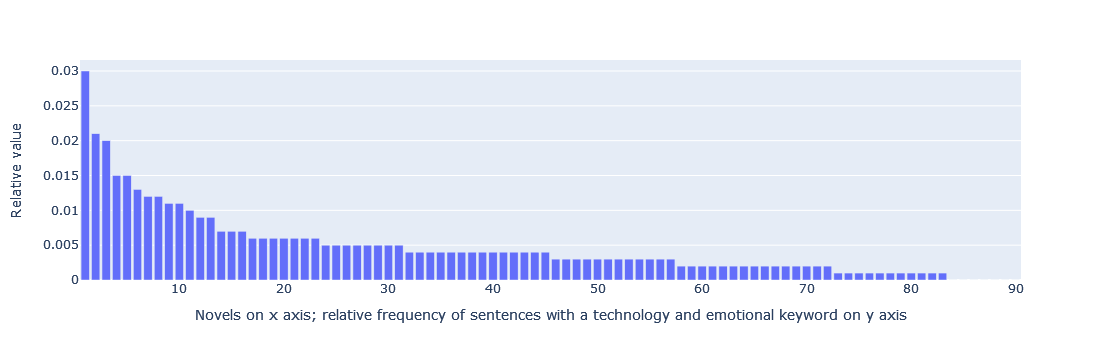

In [35]:
import plotly.express as px

x_var = new_df.index + 1
y_var = 'relative frequency'


fig = px.bar(new_df.sort_values(by=y_var, ascending=False), 
            x = x_var, 
            y = y_var,
            hover_data=['author','title', 'year', 'relative frequency'])
             
# Update x-axis label
fig.update_xaxes(title_text='Novels on x axis; relative frequency of sentences with a technology and emotional keyword on y axis')

# Update y-axis label
fig.update_yaxes(title_text='Relative value') 
print ('\nThe presens of sentences with lighting technologies and sensational words.\n'\
             'We have the relative frequency of those sentences compared to all sentences in each novel.')
fig.show()

In [36]:
import plotly.io as io

html_snippet_start = '<!DOCTYPE html> <html> <head> <title>Title</title> </head> <body>' 
html_snippet_end = ' </body></html> '

html_as_string = io.to_html(fig, full_html=False)

vis_in_html = html_snippet_start + html_as_string + html_snippet_end

of = open(r'C:\Users\lakj\Documents\GitHub\Light_in_French_Literature\visualisations\emo_in_light_sent1_years_vs_rfeq.htm', 'w', encoding='utf-8-sig')
of.write(vis_in_html)

3644773

In [28]:
# Group by year, join the textstrings and sum the numbers
data_in = new_df[['year', 'author', 'title', 'count_sentences', 's_lightning_emotion_kw']]

# Group by 'year' and aggregate the 'title' and 'author' columns
# Sum the 'count_sentences', 's_lightning_kw', and 's_lightning_emotion_kw' columns
data_out = data_in.groupby('year').agg({
    'title': ' '.join,
    'author': ' '.join,
    'count_sentences': 'sum',
    's_lightning_emotion_kw': 'sum'
}).reset_index()

data_out['relative frequency'] = round(data_out['s_lightning_emotion_kw'] / data_out['count_sentences'], 3) 


The presens of sentences with lighting technologies and sensational words


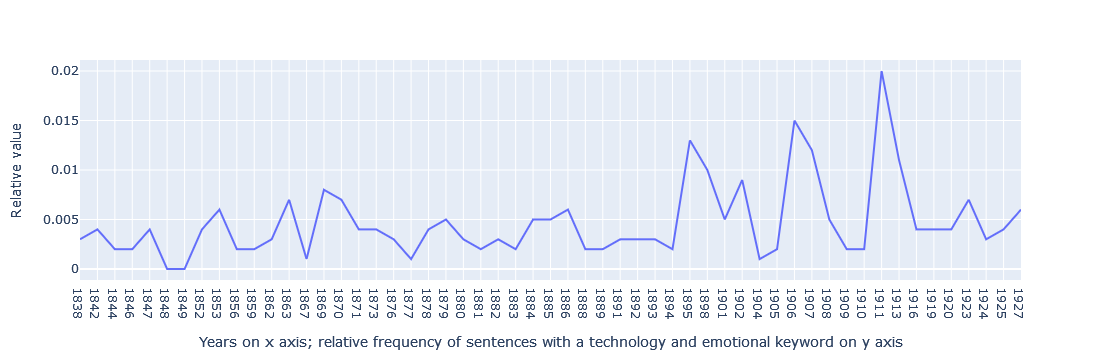

In [32]:
import plotly.express as px

x_var = 'year'
y_var = 'relative frequency'


fig = px.line(data_out, 
            x = x_var, 
            y = y_var,
            hover_data=['author','title', 'year', 'relative frequency'])
             
# Update x-axis label
fig.update_xaxes(title_text='Years on x axis; relative frequency of sentences with a technology and emotional keyword on y axis')

# Update y-axis label
fig.update_yaxes(title_text='Relative value') 
print ('\nThe presens of sentences with lighting technologies and sensational words')
fig.show()

In [34]:
import plotly.io as io

html_snippet_start = '<!DOCTYPE html> <html> <head> <title>Title</title> </head> <body>' 
html_snippet_end = ' </body></html> '

html_as_string = io.to_html(fig, full_html=False)

vis_in_html = html_snippet_start + html_as_string + html_snippet_end

of = open(r'C:\Users\lakj\Documents\GitHub\Light_in_French_Literature\visualisations\emo_in_light_sent2_years_vs_rfeq.htm', 'w', encoding='utf-8-sig')
of.write(vis_in_html)

3643779